In [209]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [210]:
import numpy as np
import pandas as pd

In [211]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [212]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [213]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [214]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [215]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [216]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [217]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [218]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [219]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# find the last data point date 
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [220]:
# Calculate the date 1 year ago from the last data point in the database
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
             filter(Measurement.date>'2016-08-23').\
             order_by(Measurement.date).all()
precipitation_data

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [221]:
# create dataframe
# replace NAN with 0
df = pd.DataFrame(precipitation_data)
df.fillna(0, inplace = True)
df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,0.00
4,2016-08-24,1.22


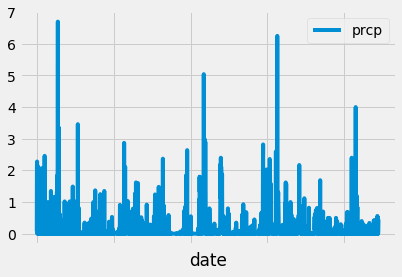

In [222]:
# plot line graph 
df.plot(kind="line", x="date", y="prcp")

In [223]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_data = df.describe()
precipitation_data

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [224]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(func.count(Station.station)).all()
stations

[(9)]

In [225]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations= session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [226]:
# create dataframe
most_active_stations_df = pd.DataFrame(data=most_active_stations, columns=['Station', 'Count'])
most_active_stations_df

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [227]:
# Query most active station
most_active_station = most_active_stations_df["Station"][0]
most_active_station

'USC00519281'

In [228]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active_station_temp = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
              group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active_station_temp

(54.0, 85.0, 71.66378066378067)

In [229]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# using last data point date ('2017-08-23',)
temperature_observations = session.query(Measurement.station, func.count(Measurement.station)).\
              filter(Measurement.date > '2016-08-23').\
              group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
temperature_observations


('USC00519397', 360)

In [265]:
# Query the last 12 months of temperature observation data for this station
# using last data point date ('2017-08-23',)
temperature_observations_total = session.query(Measurement.tobs).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station == most_active_station).\
    order_by(Measurement.tobs).all()
    

temperature_observations_total

[(59.0),
 (59.0),
 (59.0),
 (60.0),
 (60.0),
 (61.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (64.0),
 (64.0),
 (64.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 

In [231]:
# create dataframe
temperature_observations_total_df = pd.DataFrame(temperature_observations_total, columns=['Tobs'])
temperature_observations_total_df.head()

,Tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


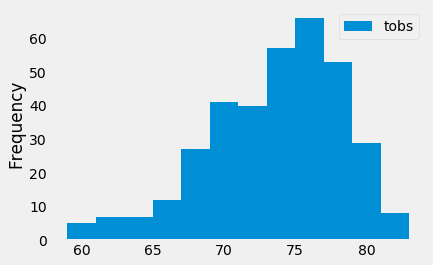

In [238]:
# Plot the results as a histogram 
plt.hist(temperature_observations_total_df.Tobs,bins=12)
plt.legend(["tobs"])
plt.ylabel('Frequency')
plt.grid()

plt.show()

In [253]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [256]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# calculate the min/max/avg from last year that matches my trip date
# trip cannot be upcoming as 8/23/2018 has passed (last data day 8/23/2017)
# taking trip 4/15/2107 - 4/22/2017

vacation = (calc_temps('2017-04-15', '2017-04-22'))
vacation

[(67.0, 72.68, 83.0)]

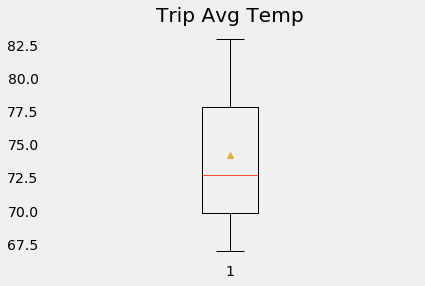

In [263]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)plt.boxplot(vacation, showmeans=True)
plt.title('Trip Avg Temp')
plt.boxplot(vacation, showmeans=True)
plt.grid()
plt.show()

In [279]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# taking trip 4/15/2107 - 4/22/2017
rainfall_per_weather_station = session.query(Measurement.station, Measurement.prcp, Station.name, Station.latitude, Station.longitude, Station.elevation).\
             filter(Measurement.date>='2016-04-15').filter(Measurement.date=<'2016-04-22').\
             group_by(Measurement.prcp).all()
rainfall_per_weather_station_df = pd.DataFrame(rainfall_per_weather_station)
rainfall_per_weather_station_df.head()

,station,prcp,name,latitude,longitude,elevation
0,USC00519523,NaN,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
1,USC00519281,0.00,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
2,USC00516128,0.01,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
3,USC00514830,0.02,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
4,USC00514830,0.03,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
